In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')

In [179]:
pollution = pd.read_csv('Datasets/pollution_wide.csv')
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8888 non-null   object 
 1   year    8888 non-null   int64  
 2   month   8888 non-null   int64  
 3   day     8888 non-null   int64  
 4   CO      8888 non-null   float64
 5   NO2     8888 non-null   float64
 6   O3      8888 non-null   float64
 7   SO2     8888 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 555.6+ KB


<AxesSubplot: xlabel='CO', ylabel='city'>

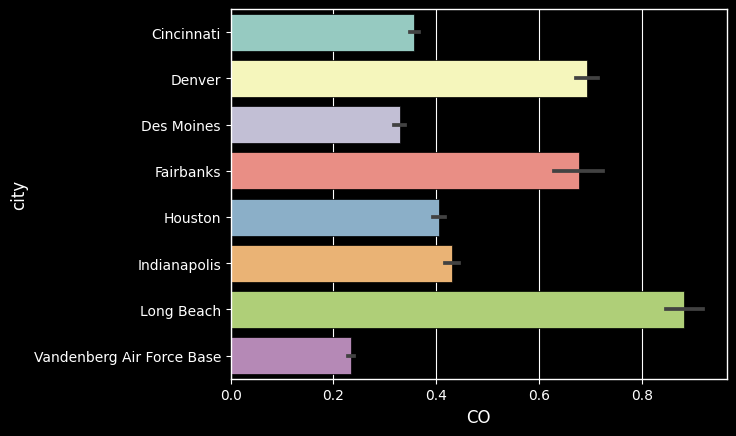

In [180]:
sns.barplot(x = 'CO', y = 'city',
           estimator = np.mean,
           data = pollution,
           edgecolor = 'black')

C:\Users\hossa\AppData\Local\Temp\ipykernel_14720\2928378622.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x= 'CO', y = 'city',


<AxesSubplot: xlabel='CO', ylabel='city'>

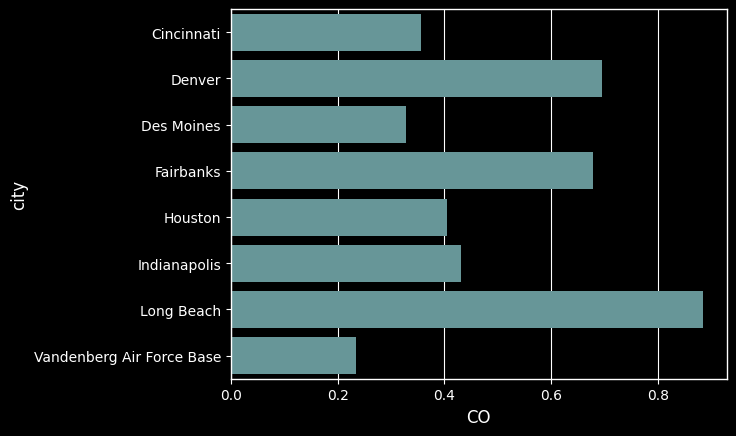

In [181]:
sns.barplot(x= 'CO', y = 'city',
           data = pollution,
           ci = False, estimator = np.mean,
           color = 'cadetblue')

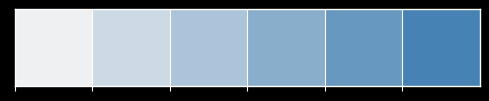

In [182]:
blue_scale = sns.light_palette('steelblue')
sns.palplot(blue_scale)

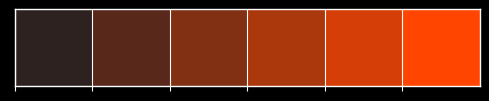

In [183]:
red_scale = sns.dark_palette('orangered')
sns.palplot(red_scale)

<AxesSubplot: >

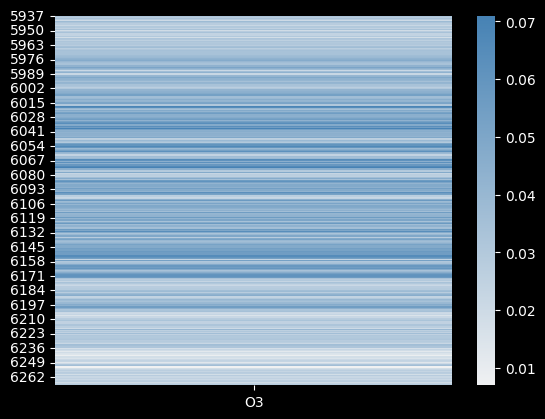

In [184]:
ind_oct = pollution.query("(year == 2015) & (city == 'Indianapolis')")
blue_scale = sns.light_palette('steelblue', as_cmap = True)

sns.heatmap(ind_oct[['O3']], cmap = blue_scale)

<AxesSubplot: >

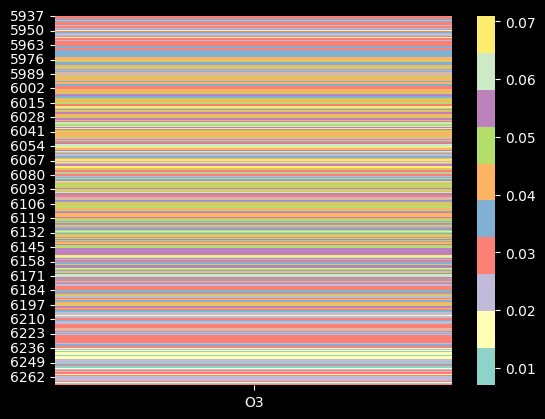

In [185]:
ind_oct = pollution.query("(year == 2015) & (city == 'Indianapolis')")

jet = plt.jet()

jet_scale = sns.color_palette(jet, as_cmap = True)

sns.heatmap(ind_oct[['O3']], cmap = jet_scale)

In [186]:
pal_light = sns.diverging_palette(250, 0)
pal_dark = sns.diverging_palette(250, 0, center = 'dark')

In [187]:
pal_light

[(0.26613466399181535, 0.47369810827813025, 0.7317615976606106),
 (0.5370642947070804, 0.6624089282430076, 0.8193382948975503),
 (0.8106397225972991, 0.8529626273091042, 0.9077702333184445),
 (0.9276657479219064, 0.8057600559831573, 0.8406551579395181),
 (0.8806176189679763, 0.5202959033482921, 0.6259841195095547),
 (0.8340245009323628, 0.237592525883977, 0.413389203308121)]

In [188]:
pal_dark

[(0.26613466399181535, 0.47369810827813025, 0.7317615976606106),
 (0.21562212443048728, 0.3429387582678472, 0.5039011087357783),
 (0.1646162983500056, 0.2109024614801199, 0.2738154197237893),
 (0.30419206859217396, 0.1571239316659993, 0.19661922446792174),
 (0.5703955355697032, 0.1975537307045751, 0.3055308659260199),
 (0.8340245009323628, 0.237592525883977, 0.413389203308121)]

In [189]:
lb_2012 = pollution.query("city == 'Long Beach' & year == 2012")

In [190]:
#plt.style.use('dark_background')

dark_palette = sns.dark_palette('orangered')

sns.scatterplot(x = 'CO', y = 'NO2',
               hue = 'O3', data = lb_2012,
               palette = dark_palette)

C:\Users\hossa\AppData\Local\Temp\ipykernel_14720\3878301333.py:5: UserWarning: 
The palette list has fewer values (6) than needed (76) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'CO', y = 'NO2',


<AxesSubplot: xlabel='CO', ylabel='NO2'>

In [191]:
cinci_2014 = pollution.query("city == 'Cincinnati' & year == 2014")

color_palette = sns.light_palette('orangered', as_cmap = True)

sns.scatterplot(x = 'CO', y = 'NO2',
               hue = 'O3',
               data = cinci_2014,
               palette = color_palette)

<AxesSubplot: xlabel='CO', ylabel='NO2'>

In [192]:
nov_2015_CO = pollution.query("year == 2015 & month == 11").pivot_table(index = 'city', columns = 'day', values = 'CO', aggfunc = 'mean')
nov_2015_CO

day                          305    306     307     308    309    310     311  \
city                                                                            
Cincinnati                   NaN    NaN     NaN     NaN    NaN  0.302  0.3340   
Denver                     0.650  1.100  0.5500  0.6500  0.550  0.600  1.0000   
Fairbanks                  0.570  0.470  1.0800  0.8150  0.760  0.430  0.7100   
Houston                    0.366  0.673  0.5215  0.4325  0.245  0.375  0.2205   
Indianapolis               0.950  1.200  1.7000  1.1000  0.350  0.250  0.3500   
Long Beach                 1.550  0.550  0.5000  0.8500  0.950  1.400  2.0000   
Vandenberg Air Force Base  0.100  0.050  0.1000  0.2000  0.200  0.200  0.2000   

day                           312     313     314  ...     325     326    327  \
city                                               ...                          
Cincinnati                 0.4490  0.4725  0.7575  ...  0.4270  0.5455  0.821   
Denver                     1.0000  1.0000  1.5000  ...  0.5500  0.8000  1.550   
Fairbanks                  0.4850  0.7150  1.2550  ...     NaN     NaN    NaN   
Houston                    0.2305  0.5605  0.7190  ...  0.3015  0.8680  0.758   
Indianapolis               0.7500  0.7000  0.7000  ...  0.4000  0.3500  0.350   
Long Beach                 1.6500  1.1500  0.5500  ...  2.2500  1.2000  1.700   
Vandenberg Air Force Base  0.2000  0.3000  0.3000  ...  0.2000  0.2500  0.300   

day                           328     329     330     331     332     333  \
city                                                                        
Cincinnati                 0.8905  0.6165  0.2985  0.2885  0.3365  0.2140   
Denver                     1.1500  1.0500  0.3500  0.3500  0.4000  0.4500   
Fairbanks                  0.4350  1.1000  0.5950  1.1050  0.9800  1.8450   
Houston                    0.5960  0.2215  0.1940  0.2095  0.2830  0.2525   
Indianapolis               1.2500  0.4000  0.2500  0.2500  0.2000  0.2000   
Long Beach                 1.5000  0.2500  1.2500  1.0000  1.0000  0.9500   
Vandenberg Air Force Base  0.2500  0.2000  0.2000  0.2000  0.2000  0.2000   

day                           334  
city                               
Cincinnati                 0.4005  
Denver                     0.5500  
Fairbanks                  1.6900  
Houston                    0.4355  
Indianapolis               0.3500  
Long Beach                 1.1500  
Vandenberg Air Force Base  0.2000  

[7 rows x 30 columns]

<AxesSubplot: xlabel='day', ylabel='city'>

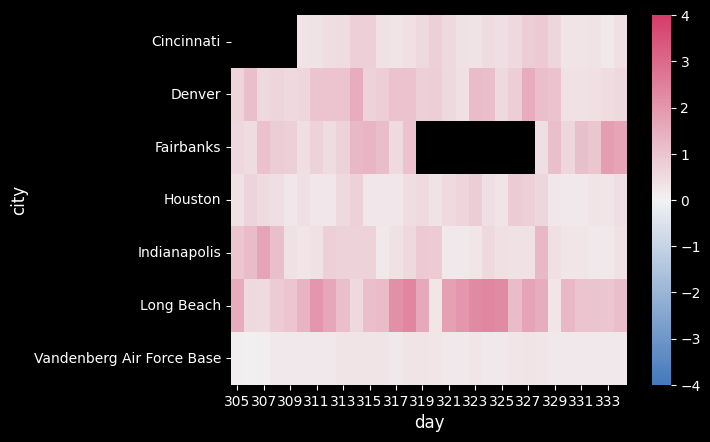

In [193]:
color_palette = sns.diverging_palette(250, 0, as_cmap = True)
#plt.style.use('ggplot')
sns.heatmap(nov_2015_CO, cmap = color_palette,
            center = 0,
            vmin = -4, vmax = 4)

In [194]:
#plt.style.use('dark_background')

nov_2015_O3 = pollution.query("year == 2015 & month == 11").pivot_table(index = 'city', columns = 'day', values = 'O3', aggfunc = 'mean')

color_palette = sns.diverging_palette(250, 0, center = 'dark', as_cmap = True)

sns.heatmap(nov_2015_O3, cmap = color_palette,
           center = 0)

<AxesSubplot: xlabel='day', ylabel='city'>

In [195]:
sns.palplot(sns.color_palette('Set2', 8))

C:\Users\hossa\AppData\Local\Temp\ipykernel_14720\3662290501.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


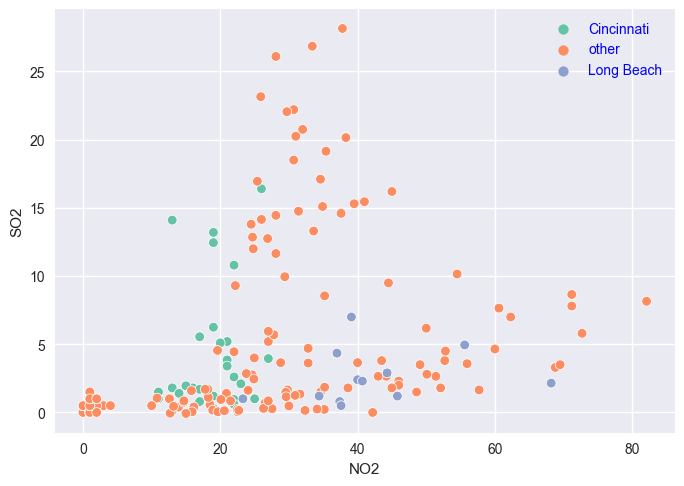

In [201]:
plt.style.use('seaborn')

pollution['interesting_cities'] = [x if x in ['Long Beach', 'Cincinnati'] else 'other' for x in pollution['city']]

sns.scatterplot(x = 'NO2', y = 'SO2',
               hue = 'interesting_cities',
               palette = 'Set2',
               data = pollution.query("year == 2014 & month == 12"))
legend = plt.legend()

for text in legend.get_texts():
    text.set_color('blue')

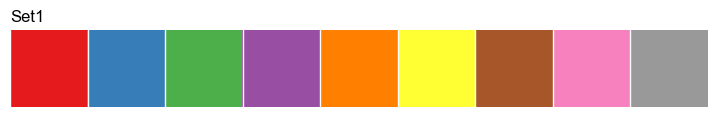

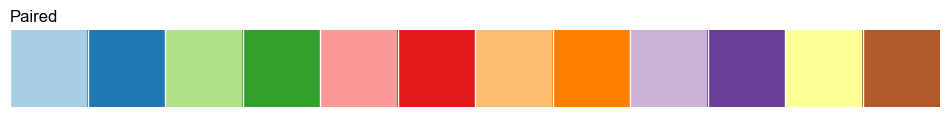

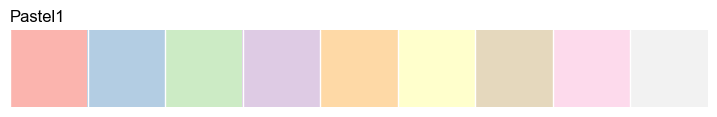

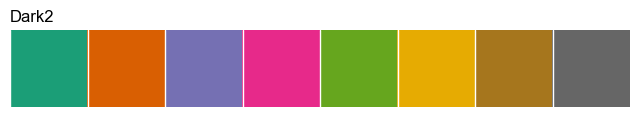

In [202]:
colorbrewer_palettes = ['Set1', 'Set2', 'Set3', 'Accent', 'Paired', 'Pastel1', 'Pastel2', 'Dark2']

for pal in colorbrewer_palettes:
    sns.palplot(pal = sns.color_palette(pal))
    plt.title(pal, loc = 'left', color = 'black')

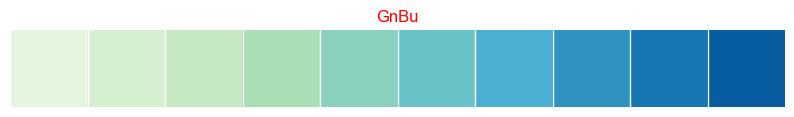

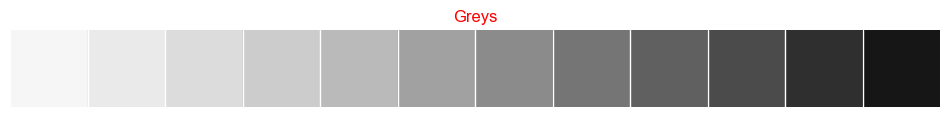

In [203]:
colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'BuGn','Greys']

for i, pal in enumerate(colorbrewer_palettes):
    sns.palplot(pal = sns.color_palette(pal, n_colors = i + 6))
    plt.title(pal, color = 'r')

In [204]:
pollution['NO2_Tertial'] = pd.qcut(pollution['NO2'], 3, labels = False)

pollution['NO2_Tertial']

sns.scatterplot(x = 'CO',y = 'SO2', hue = 'NO2_Tertial',
               data = pollution.query("city == 'Long Beach' & year == 2014"))

legend = plt.legend('NO2_Tertial')

for i in legend.get_texts():
    i.set_color('black')

C:\Users\hossa\AppData\Local\Temp\ipykernel_14720\3808352446.py:8: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x000001FA35EB0850> starts with '_'. It is thus excluded from the legend.
  legend = plt.legend('NO2_Tertial')


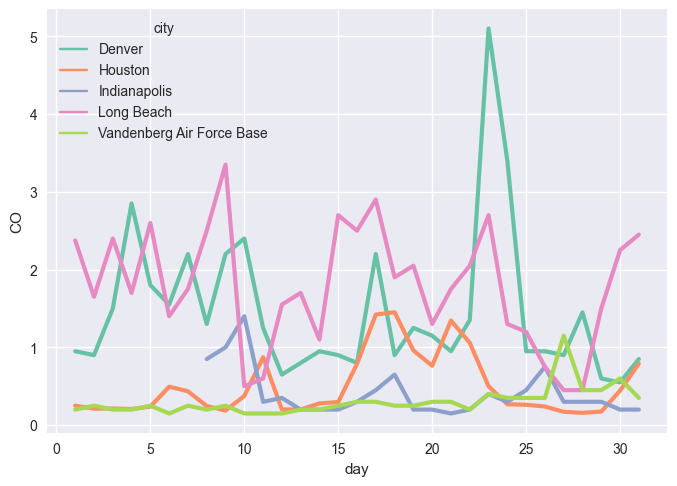

In [209]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             palette = "Set2",
             hue = 'city', 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

In [214]:
pollution['CO_quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

des_moines = pollution.query("city == 'Des Moines'")

sns.scatterplot(x = 'SO2', y = 'NO2',
               data = des_moines, 
                hue = 'CO_quartile',
               palette = 'GnBu')

<AxesSubplot: xlabel='SO2', ylabel='NO2'>